In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("births.csv")

Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc

In [3]:
df['Decade'] = (df['year'] // 10) * 10
print("Dataset havving Decade column:")
df.head()

Dataset havving Decade column:


,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Q.2: Show the descriptive statistics of the data.

In [4]:
descriptive_stats = df.describe()
print("\nDescriptive Statistics of the data:")
descriptive_stats


Descriptive Statistics of the data:


,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


Q.3: Check if data contains any missing values

In [6]:
#checking the missing values
values = df.isnull().sum()
print("\nMissing Values in the data:")
values


Missing Values in the data:


year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

Q.4: What is the trend of male & female births every decade?

In [7]:
trend_per_decade = df.groupby(['Decade', 'gender'])['births'].sum().unstack()
print("\nTrend of male & female births every decade:")
trend_per_decade


Trend of male & female births every decade:


gender,F,M
Decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.


In [9]:
#Remove outliers
mean = df['births'].mean()
std_dev = df['births'].std()
df = df[(df['births'] >= mean - 5 * std_dev) & (df['births'] <= mean + 5 * std_dev)]
print("\nDataset after removing outliers:")
df.head()


Dataset after removing outliers:


,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Q.6: Plot births by weekday for several decades. Write down your observation.

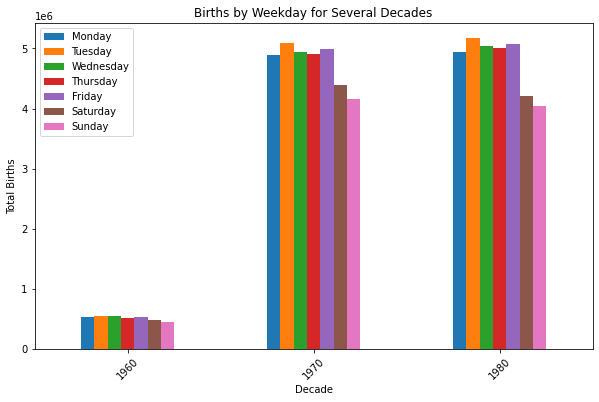

In [12]:
# Replace invalid day values with NaN
df['day'] = pd.to_numeric(df['day'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['day'], inplace=True)

# Convert 'year', 'month', and 'day' columns to datetime format
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Drop rows with NaT values (invalid dates)
df.dropna(subset=['date'], inplace=True)

# Plot births by weekday for several decades
df['weekday'] = df['date'].dt.dayofweek
births_by_weekday = df.groupby(['Decade', 'weekday'])['births'].sum().unstack()
births_by_weekday.plot(kind='bar', figsize=(10, 6))
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Decade')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


Q.7: Group the data by month and day separately

In [13]:
#Group the data by month and day separately
births_by_month = df.groupby(['month'])['births'].sum()
births_by_day = df.groupby(['day'])['births'].sum()
print("\nTotal Births by Month:")
print(births_by_month)
print("\nTotal Births by Day:")
print(births_by_day)


Total Births by Month:
month
1     5759165
2     5362585
3     5868140
4     5560775
5     5785220
6     5758571
7     6220295
8     6309764
9     6205972
10    6055372
11    5695273
12    5904376
Name: births, dtype: int64

Total Births by Day:
day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189092
30.0    2141690
31.0    1341380
Name: births, dtype: int64


Q.8: Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.

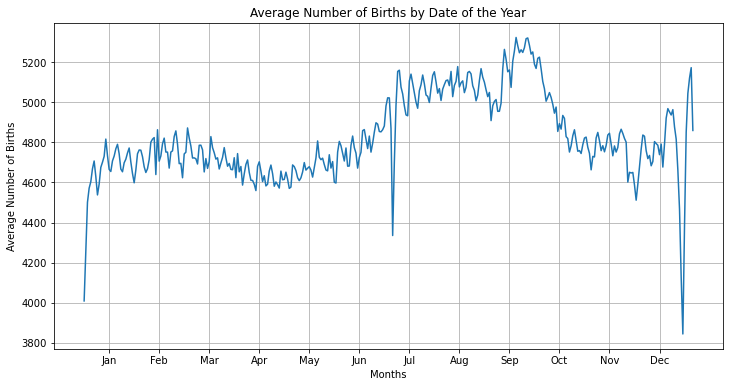

In [14]:
#Plot the time series of average births by date of the year
average_births_by_date = df.groupby(['month', 'day'])['births'].mean()
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
average_births_by_date.plot()
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Months')
plt.ylabel('Average Number of Births')
plt.grid(True)

ticks = np.arange(15, 366, 30)  
plt.xticks(ticks, labels=months_names)
plt.show()
